# Step 4: The Data Handling - Environment Data

## At this point, we will handle additional data. 
## This data constitutes additional information for the neighborhoods that we have taken.
## Below is the data we acquired:

#### The amount of schools in the neighborhood
#### The amount of kindergartens and dormitories in the neighborhood
#### The amount of informal educational institutions in the neighborhood
#### The amount of parks and gardens in the neighborhood
#### The amount of public institutions in the neighborhood
#### The amount of community institutions in the neighborhood
#### The amount of religious institutions in the neighborhood
#### The amount of green areas in square meters

#### Average distance from a school in the neighborhood
#### Average distance to a public building in the neighborhood
#### Average distance to public parks and gardens
#### Average distance from green areas in the neighborhood

In [279]:
file_name2 = "AllCitiesEnvironment (1).csv"
df_Env = pd.read_csv(file_name2)
df_Env.head()

,City,Neighborhood,Schools,Kindergartens_And_Dormitories,Non_Formal_Educational_Institutions,Education_Average_Distance,Green_Areas_SQM,Parks_And_Gardens,Green_Areas_Average_Distance,Parks_And_Gardens_Average_Distance,Public_Institutions,Community_Institutions,Religious_Institutions,Public_Building_Average_Distance
0,אופקים,אזור תעשיה,0 בתי ספר,0 גני ילדים ומעונות,0 מוסדות חינוך בלתי פורמלי,0 מטר,"7,595 מ""ר",NaN,316 מטר,228 מטר,5 מוסדות ציבור,34 מוסדות קהילתיים,0 מוסדות דת,46 מ״ר\nמרחק ממוצע למבנה ציבור
1,אופקים,בן גוריון,4 בתי ספר,12 גני ילדים ומעונות,3 מוסדות חינוך בלתי פורמלי,720 מטר,"18,272 מ""ר",1.0,334 מטר,376 מטר,5 מוסדות ציבור,5 מוסדות קהילתיים,4 מוסדות דת,98 מ״ר\nמרחק ממוצע למבנה ציבור
2,אופקים,דדו,2 בתי ספר,0 גני ילדים ומעונות,0 מוסדות חינוך בלתי פורמלי,687 מטר,"6,602 מ""ר",1.0,342 מטר,211 מטר,7 מוסדות ציבור,2 מוסדות קהילתיים,1 מוסדות דת,108 מ״ר\nמרחק ממוצע למבנה ציבור
3,אופקים,הארזים,0 בתי ספר,15 גני ילדים ומעונות,5 מוסדות חינוך בלתי פורמלי,0 מטר,"18,294 מ""ר",2.0,324 מטר,372 מטר,18 מוסדות ציבור,14 מוסדות קהילתיים,4 מוסדות דת,117 מ״ר\nמרחק ממוצע למבנה ציבור
4,אופקים,"הרי""ף",5 בתי ספר,12 גני ילדים ומעונות,0 מוסדות חינוך בלתי פורמלי,370 מטר,"18,294 מ""ר",1.0,283 מטר,222 מטר,2 מוסדות ציבור,12 מוסדות קהילתיים,5 מוסדות דת,88 מ״ר\nמרחק ממוצע למבנה ציבור


***as you can see, we have some problems with current data.***

***1) All data is accompanied by strings, which we would like to delete.***

***2) In addition, there are many 0 values, which we would not necessarily want to leave as they are.***

# 

### 4.0.1: Removing all information about industrial zones

In [280]:
df_Env.drop(index=df_Env[df_Env.Neighborhood.str.startswith("אזור תעשיה")].index,inplace=True)
df_Env.reset_index(inplace=True,drop=True)

In [282]:
df_Env.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   City                                 288 non-null    object 
 1   Neighborhood                         288 non-null    object 
 2   Schools                              288 non-null    object 
 3   Kindergartens_And_Dormitories        288 non-null    object 
 4   Non_Formal_Educational_Institutions  288 non-null    object 
 5   Education_Average_Distance           288 non-null    object 
 6   Green_Areas_SQM                      288 non-null    object 
 7   Parks_And_Gardens                    194 non-null    float64
 8   Green_Areas_Average_Distance         288 non-null    object 
 9   Parks_And_Gardens_Average_Distance   288 non-null    object 
 10  Public_Institutions                  288 non-null    object 
 11  Community_Institutions          

You can see that there are almost no deficiencies in the data, except in the column for the number of gardens and parks

Therefore, we will now extract all the numerical values ​​in the columns that are not the amount of parks and gardens

### 4.0.2: Extracting numeric values from the columns

In [288]:
column = df_Env.columns[2::]
for i in range(len(df_Env[col])):
    for col in column:
        if col!='Parks_And_Gardens':
            df_Env.loc[i, col] = df_Env[col][i].rsplit(' ')[0]
df_Env['Green_Areas_SQM'] = df_Env['Green_Areas_SQM'].str.replace(',','')

In [291]:
df_Env

,City,Neighborhood,Schools,Kindergartens_And_Dormitories,Non_Formal_Educational_Institutions,Education_Average_Distance,Green_Areas_SQM,Parks_And_Gardens,Green_Areas_Average_Distance,Parks_And_Gardens_Average_Distance,Public_Institutions,Community_Institutions,Religious_Institutions,Public_Building_Average_Distance
0,אופקים,בן גוריון,4,12,3,720,18272,1.0,334,376,5,5,4,98
1,אופקים,דדו,2,0,0,687,6602,1.0,342,211,7,2,1,108
2,אופקים,הארזים,0,15,5,0,18294,2.0,324,372,18,14,4,117
3,אופקים,"הרי""ף",5,12,0,370,18294,1.0,283,222,2,12,5,88
4,אופקים,יעקב מסיקה,9,10,2,285,21177,1.0,326,377,4,11,7,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,ראש העין,פסגת טל,0,0,0,0,136,NaN,331,622,0,0,0,105
284,ראש העין,"צה""ל",1,10,1,356,98175,4.0,356,405,6,20,12,102
285,ראש העין,ראש העין צפון,בתי,גני,מוסדות,מטר,"מ""ר",NaN,מטר,מטר,מוסדות,מוסדות,מוסדות,מ״ר\nמרחק
286,ראש העין,"רמב""ם",3,15,1,290,87814,3.0,437,434,4,25,23,77


**You can see that we have now arranged all the numerical values, but there are two problems:**

**1) There are values that do not contain numeric values at all, as a result we are left with strings.**

**2) There are still values that contain zeros, and we will have to replace them**

**The solution: First, we will convert all these values to NaN**

### 4.0.3: Converts the desired data to NaN values

In [292]:
for col in column:
    df_Env[col] = pd.to_numeric(df_Env[col],errors='coerce')
df_Env.replace(0,np.nan)

,City,Neighborhood,Schools,Kindergartens_And_Dormitories,Non_Formal_Educational_Institutions,Education_Average_Distance,Green_Areas_SQM,Parks_And_Gardens,Green_Areas_Average_Distance,Parks_And_Gardens_Average_Distance,Public_Institutions,Community_Institutions,Religious_Institutions,Public_Building_Average_Distance
0,אופקים,בן גוריון,4.0,12.0,3.0,720.0,18272.0,1.0,334.0,376.0,5.0,5.0,4.0,98.0
1,אופקים,דדו,2.0,NaN,NaN,687.0,6602.0,1.0,342.0,211.0,7.0,2.0,1.0,108.0
2,אופקים,הארזים,NaN,15.0,5.0,NaN,18294.0,2.0,324.0,372.0,18.0,14.0,4.0,117.0
3,אופקים,"הרי""ף",5.0,12.0,NaN,370.0,18294.0,1.0,283.0,222.0,2.0,12.0,5.0,88.0
4,אופקים,יעקב מסיקה,9.0,10.0,2.0,285.0,21177.0,1.0,326.0,377.0,4.0,11.0,7.0,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,ראש העין,פסגת טל,NaN,NaN,NaN,NaN,136.0,NaN,331.0,622.0,NaN,NaN,NaN,105.0
284,ראש העין,"צה""ל",1.0,10.0,1.0,356.0,98175.0,4.0,356.0,405.0,6.0,20.0,12.0,102.0
285,ראש העין,ראש העין צפון,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286,ראש העין,"רמב""ם",3.0,15.0,1.0,290.0,87814.0,3.0,437.0,434.0,4.0,25.0,23.0,77.0


Now, we want to replace the NaN values.
But should it be done according to the median or the average?
To answer this question, right now we will fill in according to the median and also according to the average.
We will save the data in two separate DataSets.
In the machine learning phase we can compare training with median and training with average.

### 4.0.4: Filling NaN values according to median and according to average

In [293]:
df_Env_MedFill = df_Env.copy()
df_Env_AvgFill = df_Env.copy()
for col in columns:
    df_Env_MedFill = df_Env_MedFill.fillna(df_Env_MedFill[col].median())
    df_Env_AvgFill = df_Env_AvgFill.fillna(df_Env_AvgFill[col].mean())


In [294]:
for col in column:
    df_Env_MedFill[col] = df_Env_MedFill[col].astype('int32')
    df_Env_AvgFill[col] = df_Env_AvgFill[col].astype('int32')

In [295]:
df_Env_MedFill.describe()

,Schools,Kindergartens_And_Dormitories,Non_Formal_Educational_Institutions,Education_Average_Distance,Green_Areas_SQM,Parks_And_Gardens,Green_Areas_Average_Distance,Parks_And_Gardens_Average_Distance,Public_Institutions,Community_Institutions,Religious_Institutions,Public_Building_Average_Distance
count,288.000000,288.000000,288.000000,288.000000,2.880000e+02,288.000000,288.000000,288.000000,288.00000,288.000000,288.000000,288.000000
mean,2.211806,9.187500,1.618056,204.420139,1.054197e+05,2.569444,236.138889,273.256944,6.21875,12.684028,3.649306,170.906250
std,3.120171,11.779311,2.058370,361.168951,1.478063e+05,2.282039,95.400174,144.491262,8.30625,20.631177,4.670159,172.334903
min,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,2.003925e+04,1.000000,172.250000,186.750000,1.00000,1.000000,0.000000,96.750000
50%,1.000000,6.000000,1.000000,190.000000,6.222950e+04,1.000000,222.500000,237.500000,4.00000,5.000000,2.000000,130.000000
75%,3.000000,13.000000,3.000000,263.250000,1.435662e+05,3.000000,290.250000,343.750000,8.00000,14.000000,5.000000,197.000000
max,30.000000,126.000000,12.000000,5349.000000,1.325565e+06,15.000000,544.000000,903.000000,64.00000,141.000000,23.000000,1854.000000


In [296]:
df_Env_AvgFill.describe()

,Schools,Kindergartens_And_Dormitories,Non_Formal_Educational_Institutions,Education_Average_Distance,Green_Areas_SQM,Parks_And_Gardens,Green_Areas_Average_Distance,Parks_And_Gardens_Average_Distance,Public_Institutions,Community_Institutions,Religious_Institutions,Public_Building_Average_Distance
count,288.000000,288.000000,288.000000,288.000000,2.880000e+02,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,2.236111,9.211806,1.642361,204.444444,1.054197e+05,2.895833,236.166667,273.295139,6.243056,12.708333,3.673611,170.930556
std,3.114507,11.763358,2.056826,361.155246,1.478062e+05,2.097680,95.331587,144.419153,8.292347,20.617936,4.658857,172.310924
min,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,2.003925e+04,2.000000,172.250000,186.750000,1.000000,1.000000,0.000000,96.750000
50%,1.000000,6.000000,1.000000,190.000000,6.222950e+04,2.000000,222.500000,237.500000,4.000000,5.000000,2.000000,130.000000
75%,3.000000,13.000000,3.000000,263.250000,1.435662e+05,3.000000,290.250000,343.750000,8.000000,14.000000,5.000000,197.000000
max,30.000000,126.000000,12.000000,5349.000000,1.325565e+06,15.000000,544.000000,903.000000,64.000000,141.000000,23.000000,1854.000000


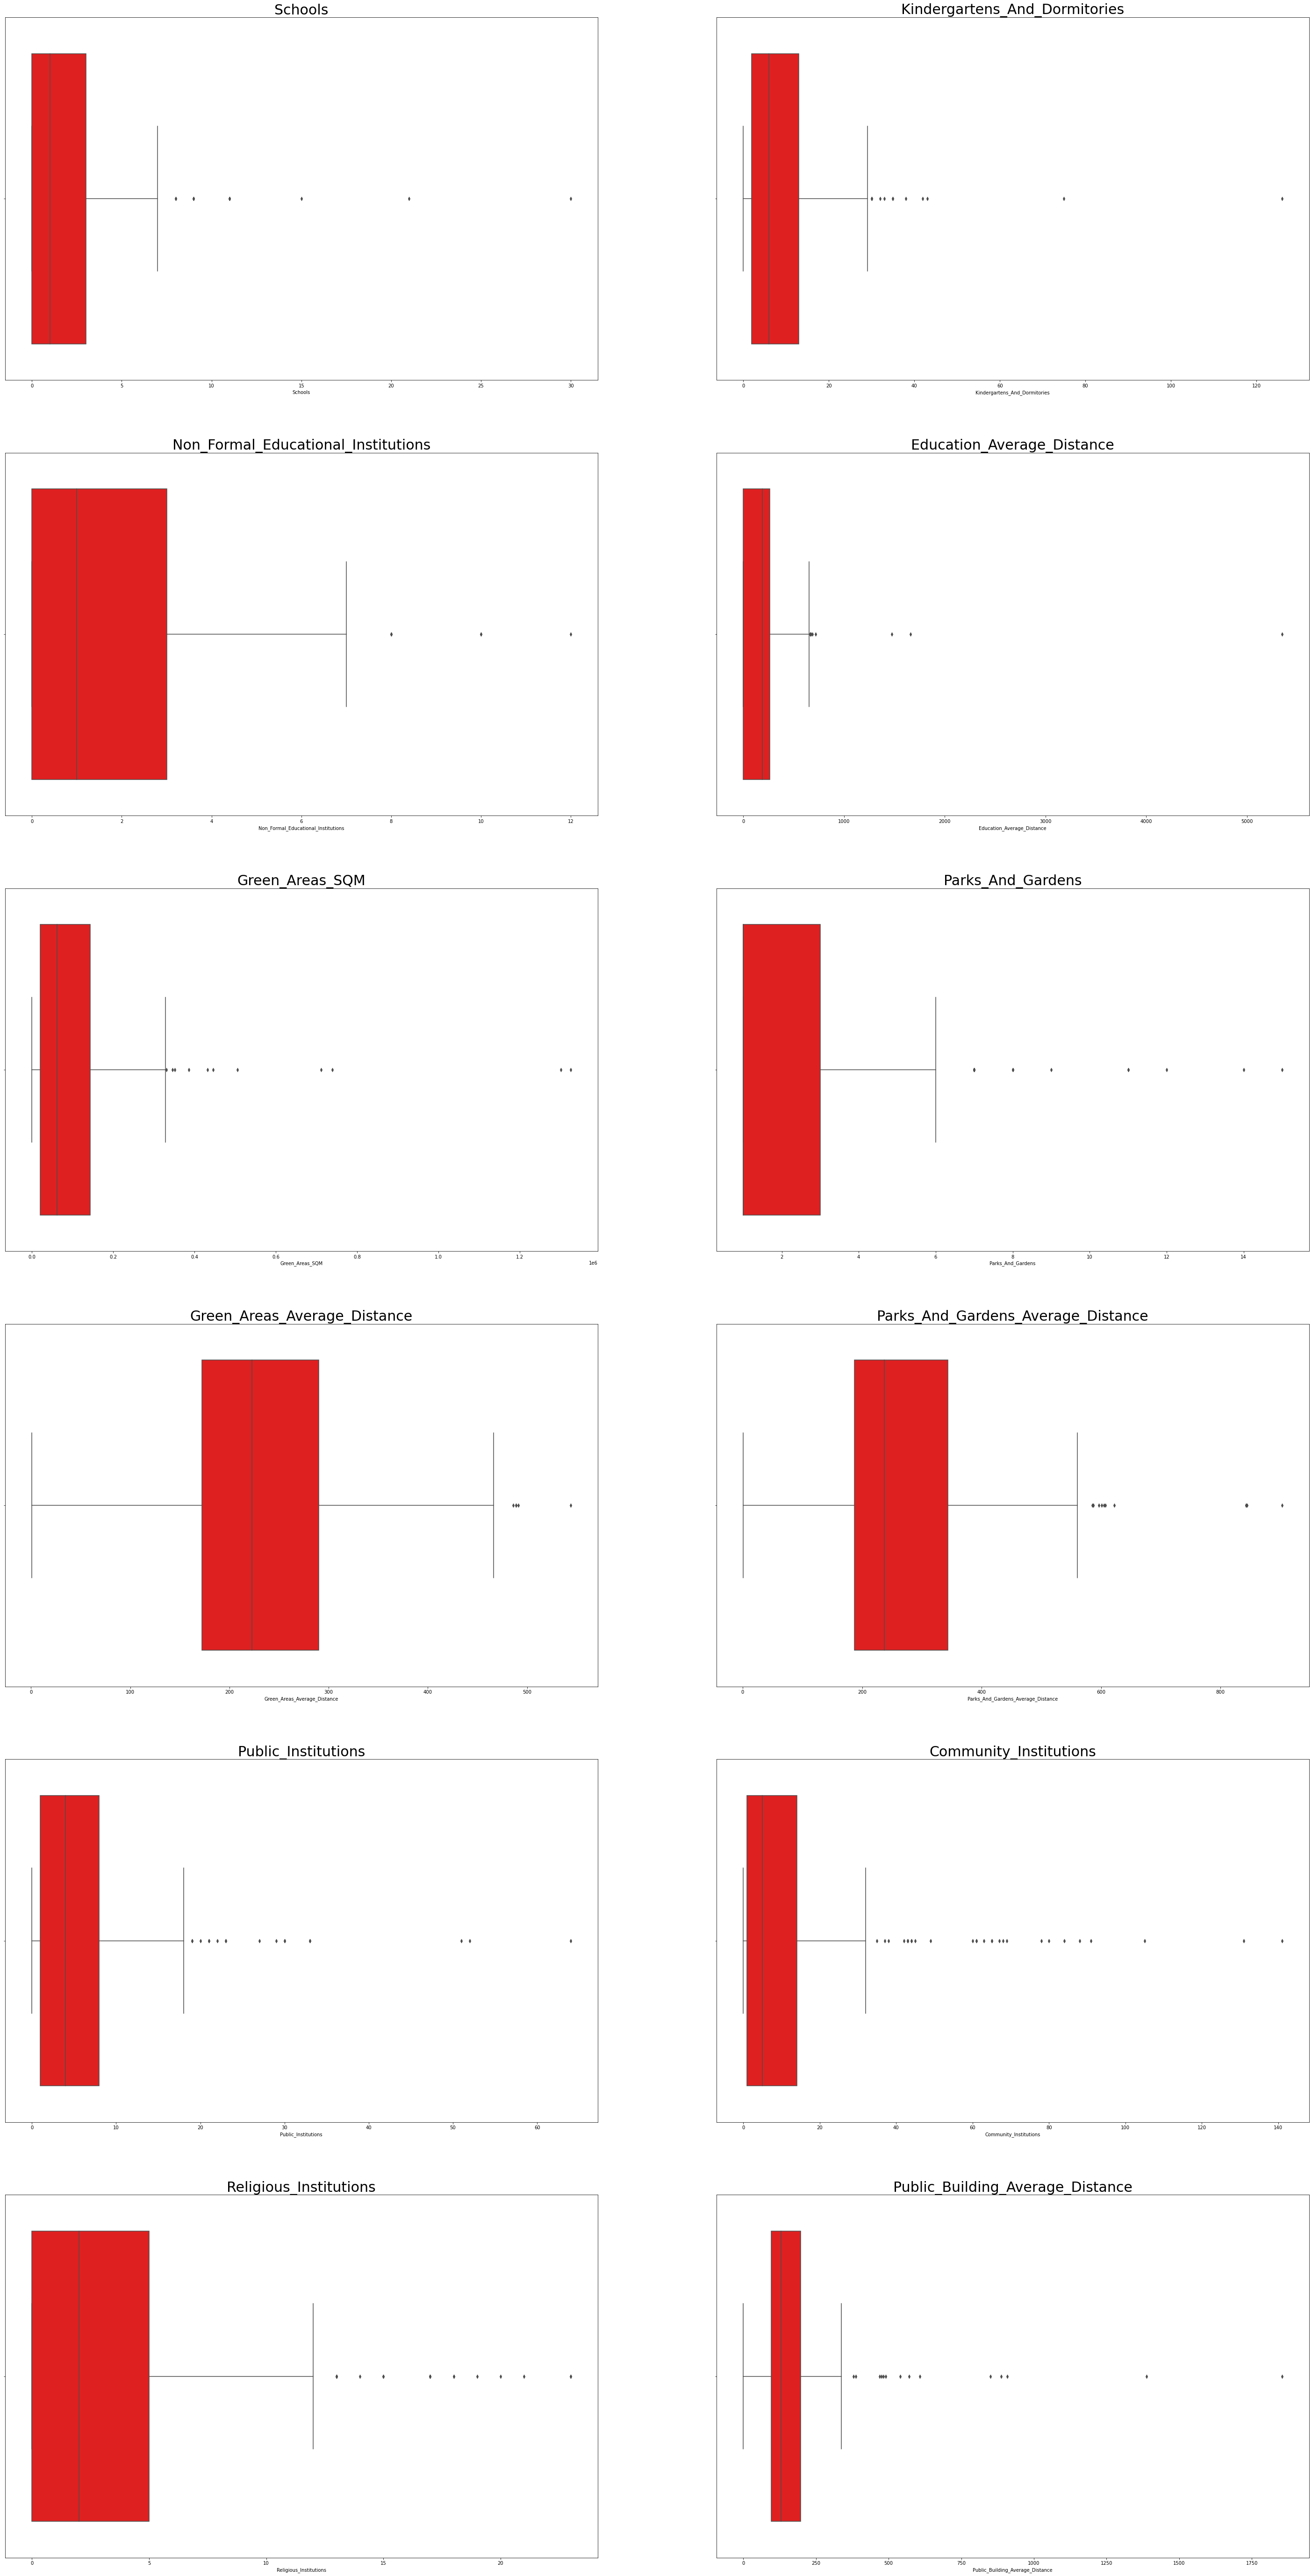

In [335]:
figure,axis = plt.subplots(6,2,figsize=(50,100))
i=0
for col in df_Env_MedFill.columns[2::]:
    sb.boxplot(data=df_Env_MedFill,x=col,ax=axis[int(i/2),int(i%2)],color='r')
    axis[int(i/2),int(i%2)].set_title(col,fontsize=30)
    i+=1

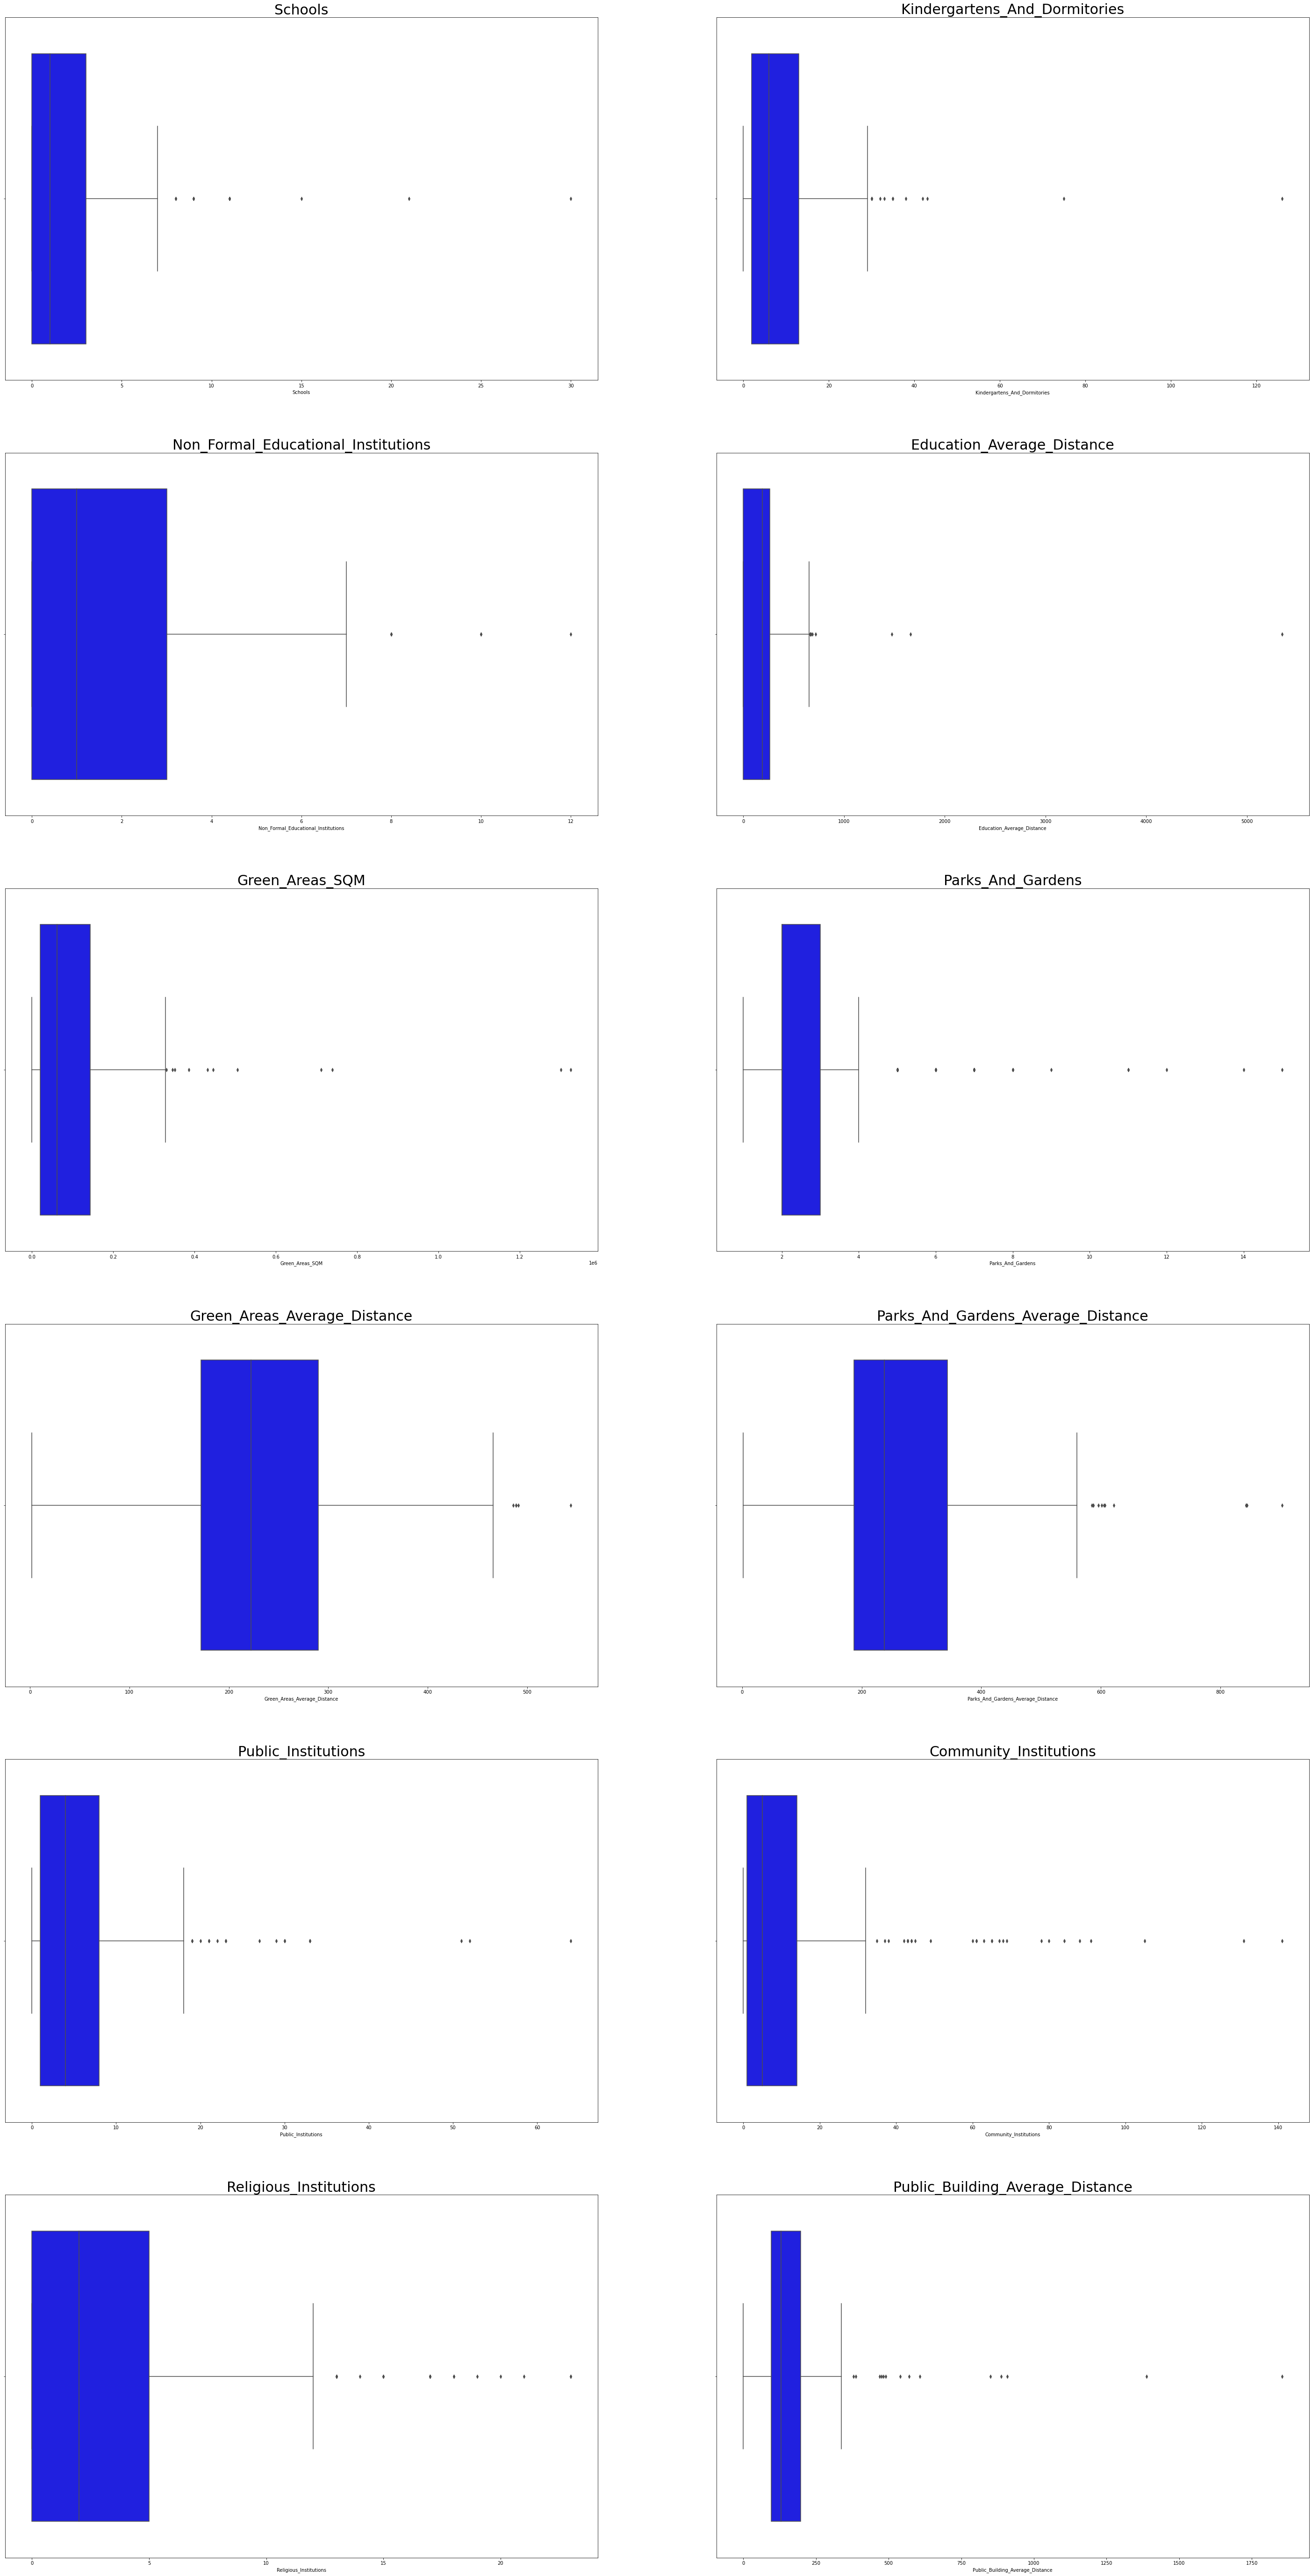

In [337]:
figure,axis = plt.subplots(6,2,figsize=(50,100))
i=0
for col in df_Env_AvgFill.columns[2::]:
    sb.boxplot(data=df_Env_AvgFill,x=col,ax=axis[int(i/2),int(i%2)],color='b')
    axis[int(i/2),int(i%2)].set_title(col,fontsize=30)
    i+=1

#### as you can see, There are almost no differences in terms of completing the average and completing the median.

In [339]:
df_Env.to_csv('AllCitiesEnvironment (MedianFill).csv')
df_Env.to_csv('AllCitiesEnvorinment (AverageFill).csv')